<a href="https://colab.research.google.com/github/LaetitiaAurore/My-Data-Projects/blob/main/Amazon_Sales_Analysis_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/content/Amazon Sales data.csv')
display(df.head())
print(df.info())

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


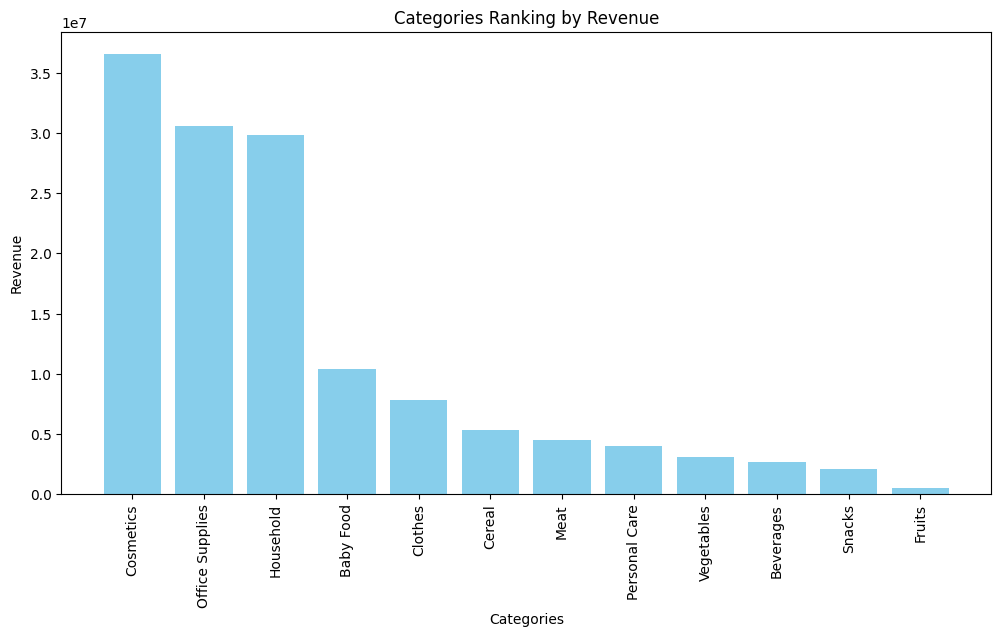

In [14]:
# Aggregate total sales and revenue per product
top_categories = df.groupby('Item Type').agg({'Units Sold': 'sum', 'Total Revenue': 'sum'}).reset_index()

# Sort by revenue to get top-selling products
top_categories = top_categories.sort_values(by='Total Revenue', ascending=False)

# Data Visualization
plt.figure(figsize=(12, 6))
plt.bar(top_categories['Item Type'], top_categories['Total Revenue'], color='skyblue')
plt.xlabel("Categories")
plt.ylabel("Revenue")
plt.title("Categories Ranking by Revenue")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Filter dataset for the best category
best_category = top_categories.iloc[0]['Item Type']
df_best_category = df[df['Item Type'] == best_category]
display(df_best_category.head())

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
16,Asia,Sri Lanka,Cosmetics,Offline,M,11/19/2016,419123971,12/18/2016,6952,437.2,263.33,3039414.4,1830670.16,1208744.24
25,Europe,France,Cosmetics,Online,H,5/22/2017,898523128,6/5/2017,1815,437.2,263.33,793518.0,477943.95,315574.05
30,Europe,Switzerland,Cosmetics,Offline,M,9/17/2012,249693334,10/20/2012,8661,437.2,263.33,3786589.2,2280701.13,1505888.07
41,Middle East and North Africa,Azerbaijan,Cosmetics,Online,M,2/6/2010,382392299,2/25/2010,7234,437.2,263.33,3162704.8,1904929.22,1257775.58
46,Europe,Iceland,Cosmetics,Online,C,12/31/2016,331438481,12/31/2016,8867,437.2,263.33,3876652.4,2334947.11,1541705.29


Predicting future sales for: Cosmetics


,Order Date,Units Sold
0,10/11/2013,4477
1,10/13/2013,1705
2,11/15/2016,6489
3,11/19/2016,6952
4,11/26/2010,7910


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsdj4coh/qorc541e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjsdj4coh/jh0nqbh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64036', 'data', 'file=/tmp/tmpjsdj4coh/qorc541e.json', 'init=/tmp/tmpjsdj4coh/jh0nqbh4.json', 'output', 'file=/tmp/tmpjsdj4coh/prophet_modelte9k03_1/prophet_model-20250318141428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:14:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:14:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


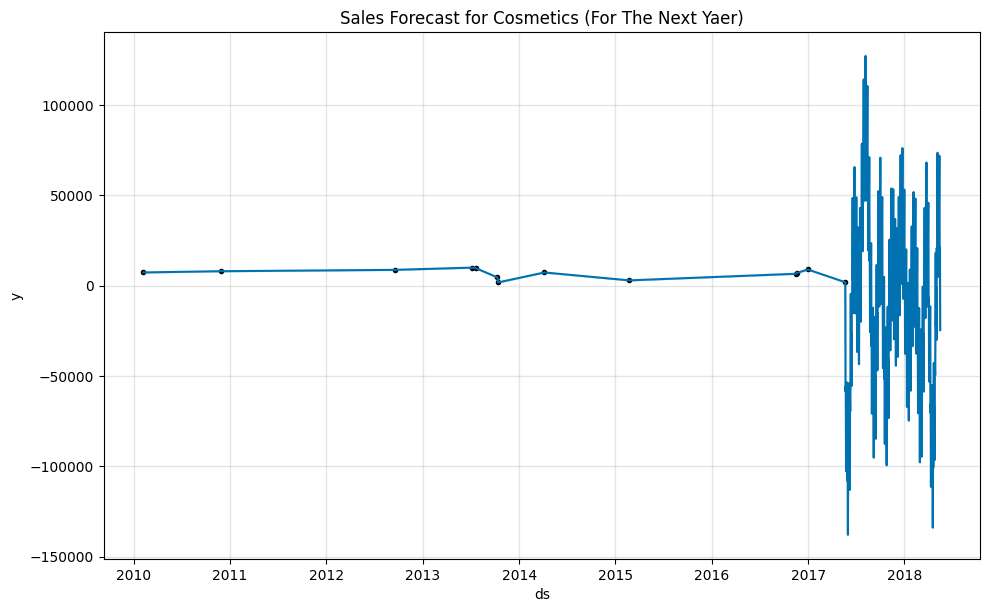

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Aggregate sales
df_best_category = df_best_category.groupby('Order Date')['Units Sold'].sum().reset_index()
print(f"Predicting future sales for: {best_category}")
display(df_best_category.head())

# Rename columns for Prophet
df_best_category = df_best_category.rename(columns={'Order Date': 'ds', 'Units Sold': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit model
model.fit(df_best_category)

# Create future dataframe (predict next 6 months)
future = model.make_future_dataframe(periods=360)

# Predict future sales
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title(f"Sales Forecast for {best_category} (For The Next Yaer)")
plt.show()


This plot shows the predicted sales for the best-selling product category over the next year using the Prophet library. It includes:

Black Dots: Representing the actual historical sales data used to train the model.
Blue Line: Which shows the predicted sales forecast for the future.
Light Blue Shaded Region: Represents the uncertainty interval around the forecast, indicating the range within which the actual sales are likely to fall.

The overall direction of the blue line indicates the general trend of sales. Since it's rather straight, it suggests future sales will be similar to the average historical sales.

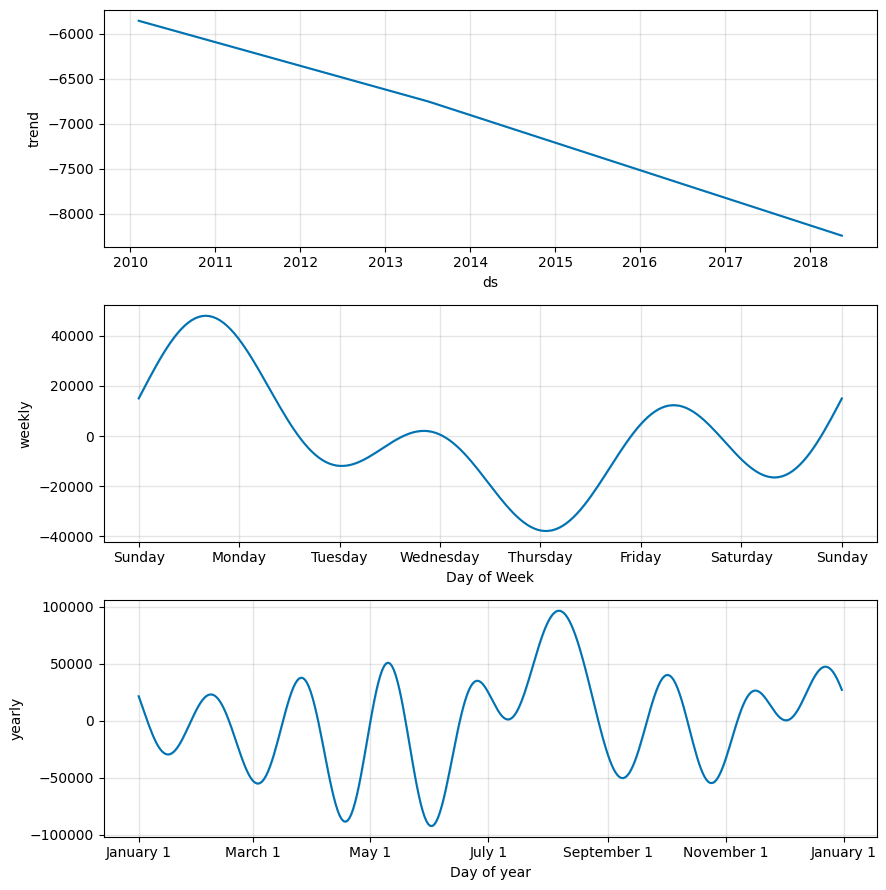

In [17]:
# Analyze Trends & Seasonality
fig2 = model.plot_components(forecast)
plt.show()

Thoses figures show how the overall trend and seasonality factors (weekly and yearly patterns) contribute to the predicted sales values. This information helps in understanding the underlying patterns driving sales and making informed business decisions.